# Lec 11.1 Machine learning 1

# Introduction

Machine Learning has emerged as an important tool accross the scientific diciplines. We allready have encountered machine learning in fitting lines to data in Lec 9.1. In the tutorial we covered, we split the data into a training set and a prediction set, a very common methodology in machine learning.

The most commonly used package for machine learning is scikit-learn, which we will play around with this week.

There are a number of types of machine learning algorithms, aka "estimators". Click on this link:
https://scikit-learn.org/stable/tutorial/machine_learning_map/

These can be divided up into:

1) Regression, which we did with line fitting. This involves finding the best fit parameters for some model.

2) Clustering, which groups data by some similarity criterion (e.g., all large green birds vs. all small red birds)

3) Dimensionality reduction, which breaks data, usually timesries data, into principle components. Fourier decomposition is an example of this

4) Classification. What is the difference between this and clustering? Something about if you are trying to predict instead of just describe. 

See also: https://scikit-learn.org/stable/tutorial/basic/tutorial.html



# Exercises

To start, we are folling the tutorial here: https://www.dataquest.io/blog/sci-kit-learn-tutorial/
        
This goes through a number of estimator methods shallowly, but gives you a good idea of how to get your data in a state to interface with sklearn and how to use the different methods

## Skip the visualization part and the end of the tutorial

Unless you want to fiddle around with trying to get yellowbrick installed

We will go over visualization next lecture


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import geopandas as gpd
import pandas as pd
from descartes import PolygonPatch

In [10]:
#import necessary modules
import pandas as pd
#store the url in a variable
url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"

In [11]:
# Read in the data with `read_csv()`
sales_data = pd.read_csv(url)

In [12]:
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [13]:
sales_data.head(n=2)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1


In [14]:
sales_data.tail(n=2)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


In [16]:
sales_data.dtypes # Gives the data type for each column

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

Data Visualization

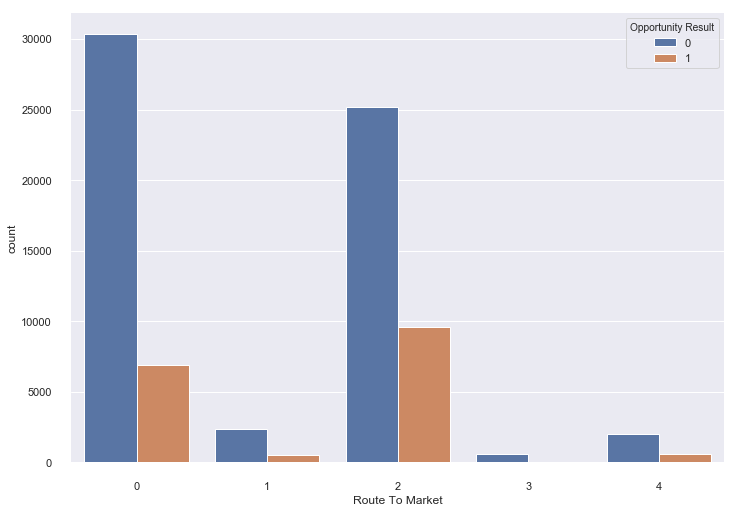

In [35]:
# import the seaborn module
import seaborn as sns

# import the matplotlib module
import matplotlib.pyplot as plt

# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create a countplot
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')

# Remove the top and down margin
sns.despine(offset=10, trim=True)

# display the plotplt.show()

Data PREP

LabelEncoder() = We will use this method to convert the categorical labels in our data set like ‘won’ and ‘loss’ into numerical labels. To visualize what we are trying to to achieve with the LabelEncoder() method let’s consider the images below.

We will use the fit_transform() method provided by LabelEncoder() to encode the labels in the categorical column such as ‘Route To Market’ in the sales_data dataframe and convert them into numeric labels similar to what we visualized in the above diagrams. The fit_transform() function takes user defined labels as input and then returns encoded labels. Let’s go through a quick example to understand how the encoding is done. In the code example below we have a list of cities i.e. ["paris", "paris", "tokyo", "amsterdam"] and we will try to encode these string labels into something similar to this – [2, 2, 1,3].

In [18]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

print(encoded_value)

[1 1 2 0]


In [21]:
# Checks unique values in each subgroup for encoding purposes for nominal data
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("'Supplies Group : ",sales_data['Supplies Group'].unique())


Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


In [22]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

#display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


Training Set and Testing Set

In [24]:
# select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]

#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']

data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


The first argument of the train_test_split() method are the features that we separated out in the previous section, the second argument is the target(‘Opportunity Result’). The third argument ‘test_size’ is the percentage of the data that we want to separate out as training data . In our case it’s 30% , although this can be any number. The fourth argument ‘random_state’ just ensures that we get reproducible results every time.

In [25]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.30, random_state = 10)

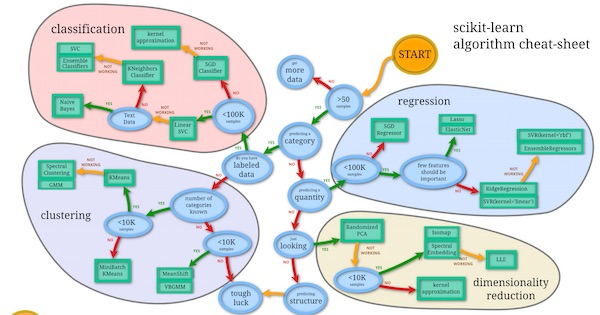

These are some methods to building a predictive model

We can use this map as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category we fall:
More than 50 samples – Check
Are we predicting a category – Check
We have labeled data? ( data with clear names like opportunity amount etc.) – Check
Less than 100k samples – Check
Based on the checklist that we prepared above and going by the machine_learning_map we can try out the below mentioned algorithms.
Naive Bayes
Linear SVC
K-Neighbours Classifier

### NAIVE BAYES METHOD
Scikit-learn provides a set of classification algorithms which “naively” assumes that in a data set every pair of features are independent. This assumption is the underlying principle of Bayes theorem. The algorithms based on this principle are known as Naive-Bayes algorithms.
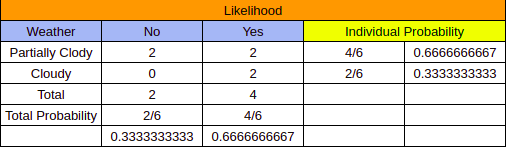

In [26]:
# import the necessary module Gaussian Naive Bayes Method - more mathematically complex
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
gnb = GaussianNB()

#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())

#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


Gaussian-Bayes Model is 76% accurate

### Linear SVC METHOD

LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes. To get a clear understanding of this concept let’s imagine a data set of ‘dots’ and ‘squares’ divided into a two dimensional space along two axis, as shown in the image below:
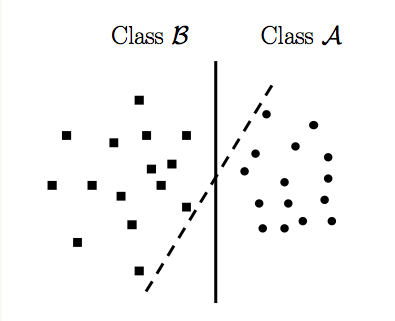

In [28]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)

#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.777811004784689


C:\Users\alvar\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The model was 78% accurate at predicting the test data

### K-Neighbors Classifier

In [29]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)

#Train the algorithm
neigh.fit(data_train, target_train)

# predict the response
pred = neigh.predict(data_test)

# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494


KNeighbors model predicted 81% of the test data accurately.

### E1. What does the despine function do? How useful is this?

This removes the top and down margins for data visualization purposes.

### E2. Change the font size in the violin plots.

In [41]:
# import the seaborn module
import seaborn as sns

# import the matplotlib module
import matplotlib.pyplot as plt

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(16.7,13.27)}, font_scale=3.0)

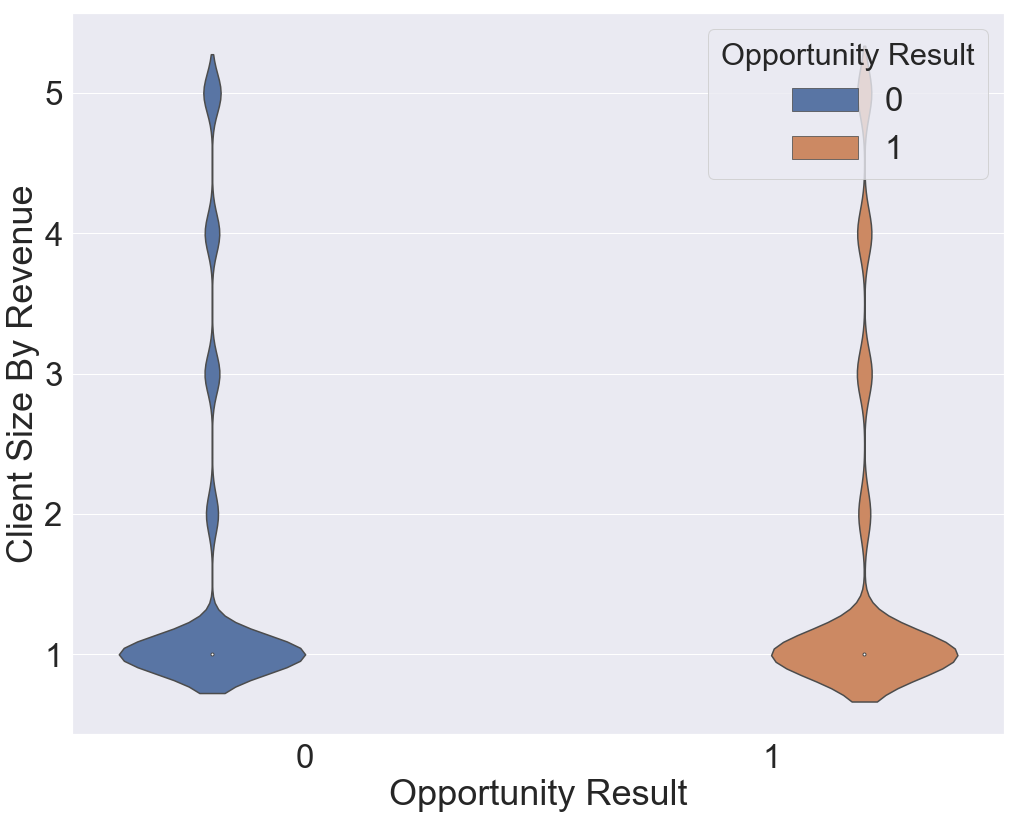

In [42]:
# plotting the violinplot
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()

### E3. Is the Label Encoder case sensitive? Show some code that demonstrates

In [43]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['supplies subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['route to market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['opportunity result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['competitor type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['supplies group'])

#display the initial records
sales_data.head()

KeyError: 'supplies subgroup'

THIS FUNCTION IS CASE-SENSITIVE!!!

### E4. The tutorial suggests you write over your original data, changing the text to numerical data. Suppose you wanted to keep the classification text info, linking the numerical and text information. How would you do this?

I would add a new string column that keeps that information.

In [54]:
# Read in the data with `read_csv()`
sales_data = pd.read_csv(url)
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [55]:
text_label = sales_data['Opportunity Result'] # store it to add it to the encoded one later
text_label.head()

0     Won
1    Loss
2     Won
3    Loss
4    Loss
Name: Opportunity Result, dtype: object

In [56]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

#display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [58]:
# select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]

#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']

data = data + text_label[cols]
data.head()

KeyError: "None of [Index(['Supplies Subgroup', 'Supplies Group', 'Region', 'Route To Market',\n       'Elapsed Days In Sales Stage', 'Sales Stage Change Count',\n       'Total Days Identified Through Closing',\n       'Total Days Identified Through Qualified', 'Opportunity Amount USD',\n       'Client Size By Revenue', 'Client Size By Employee Count',\n       'Revenue From Client Past Two Years', 'Competitor Type',\n       'Ratio Days Identified To Total Days',\n       'Ratio Days Validated To Total Days',\n       'Ratio Days Qualified To Total Days', 'Deal Size Category'],\n      dtype='object')] are in the [index]"

### E5 Explain how the cols for loop works. What does this piece of code do? How does it do it?

# select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
This piece of code filters out the columns 'opportunity result'(because this is test) and 'opportunity result' (not needed) in the sales dataset. Look for columns in sales data columns if they're not 'column names'


### E6. What is the random_state in the train_test_split function? Hint: use the help files

The fourth argument ‘random_state’ just ensures that we get reproducible results every time.

### E7. What are the sizes of the data and target training and testing variables? What would you change to have 80% of the data used for training?

The training variables contain 70% of the data while the testing variables contain 30% of the data. I would change the test size to 0.2 to have 80% of the data used for training.

### E8. What does the Naive-Bayes accuracy mean? How do you interperet this? How would this business use the information?

Gaussian-Bayes Model is 76% accurate at predicting the test data. The business can use this model to predict wins/losses from opportunities being 76% confident about their predictions.